# **Group 8 Project Proposal - User Knowledge Modeling Data Set**
Authors: Minting Fu, Zeti Batrisha Jamiluddin Amini, Liz Ji, Caroline Zhang

## INTRODUCTION

To have a better understanding of the level of knowledge of students/users, the user modeling system (UMS) will be used. "UMS tracks students’ learning activities, navigation paths and stores this data in their user model. This data are used as input data by a user modeling algorithm aimed at creating a consistent description of the model of students. After that, the input data is used to create and to update user knowledge model" (Kahraman, Sagiroglu, Colak, 2013). In this study, we are going to explore the user knowledge model.

We would like to investigate these questions through our project:
* Which variable(s) affects the UNS(the knowledge level of user)? 
* To what extent does it influences the UNS?


We are using the User Knowledge Modeling Data Set from UCI Machine Learning Repository. The dataset can be found at <a href="https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling" target="_blank">this link</a>. The user modeling system (UMS) classifies the knowledge levels (UNS) of users depending on the real-values of five arrtibutes. They are:

* STG : The degree of study time for goal object materails.
* SCG : The degree of repetition number of user for goal object materails.
* STR : The degree of study time of user for related objects with goal object.
* LPR : The exam performance of user for related objects with goal object.
* PEG : The exam performance of user for goal objects.
* UNS : The knowledge level of user.

## Citation
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

## Data Analysis

In [1]:
#Import the pacakge we need in order to analyze the dataset
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
## download 
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls'
download.file(url, destfile='data/user_knowledge_data.xls')

## read and clean the data
training_data <- read_excel('data/user_knowledge_data.xls', sheet=2, range='A1:F259') %>% 
                mutate(UNS = as_factor(UNS))
test_data <- read_excel('data/user_knowledge_data.xls', sheet=3, range='A1:F146') %>% 
                mutate(UNS = as_factor(UNS))

## clean and wrangle the data
Training_data_clean <- mutate(training_data , UNS = as_factor(UNS))
Test_data_clean <- mutate(test_data, UNS = as_factor(UNS))

Training_data_clean
Test_data_clean


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


In [3]:
## summarize the data 
Training_data_clean <- training_data %>%
                       group_by(UNS) %>%
                       summarize(n = n())

Test_data_clean <- test_data %>%
                       group_by(UNS) %>%
                       summarize(n = n())
                       
training_data_max <- training_data %>%
                     select(-UNS) %>%
                     map_df(max, na.rm = TRUE)


training_data_min <- training_data %>%
                     select(-UNS) %>%
                     map_df(min, na.rm = TRUE)


training_data_avg <- training_data %>%
                     select(-UNS) %>%
                     map_df(mean, na.rm = TRUE)

Training_data_clean
Test_data_clean
training_data_max
training_data_min
training_data_avg

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



UNS,n
<fct>,<int>
very_low,24
High,63
Low,83
Middle,88


UNS,n
<fct>,<int>
Very Low,26
Low,46
High,39
Middle,34


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.99,0.9,0.95,0.99,0.93


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


## Scatter plot

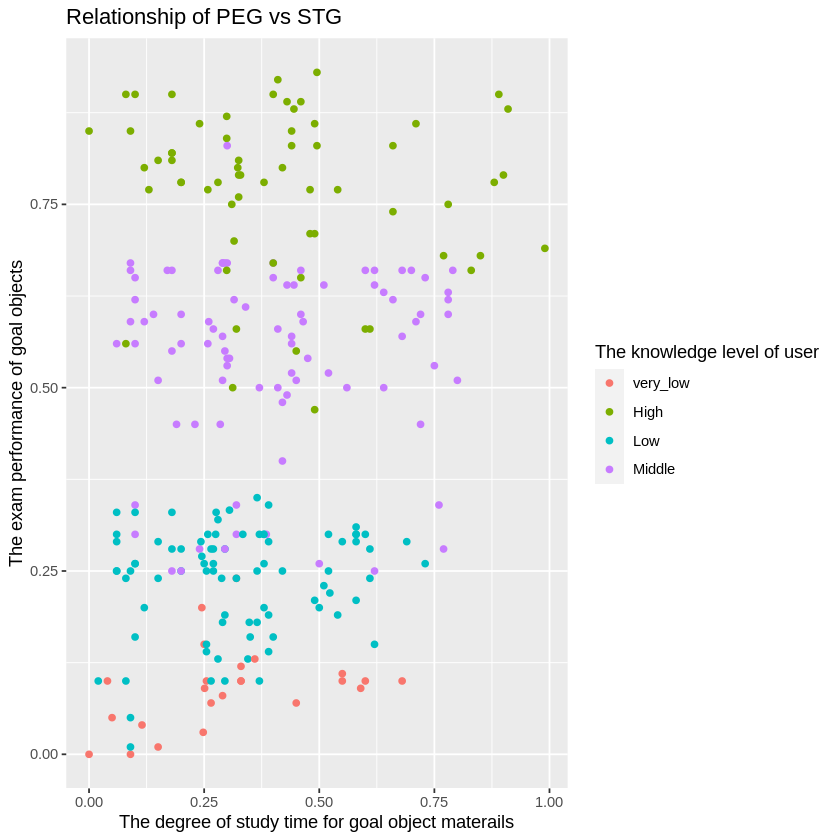

In [4]:
peg_vs_stg <- training_data %>%
            ggplot(aes(x = STG, y = PEG , color = UNS)) +
            geom_point() +
            labs(x = "The degree of study time for goal object materails", y = "The exam performance of goal objects", color = "The knowledge level of user", title = "Relationship of PEG vs STG")
peg_vs_stg

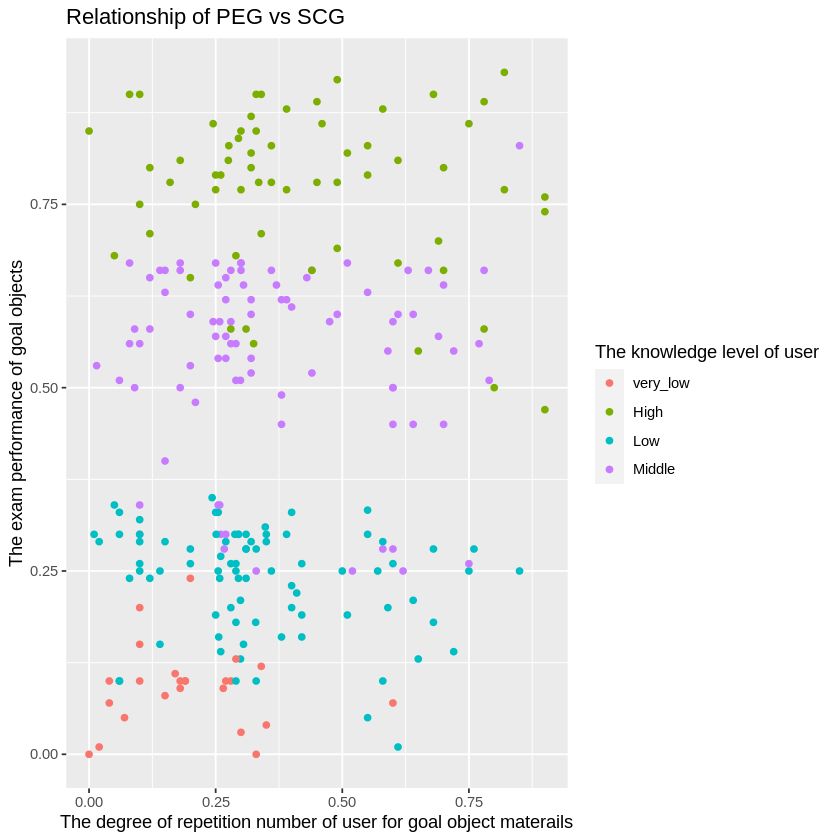

In [5]:
peg_vs_scg <- training_data %>%
            ggplot(aes(x = SCG, y = PEG , color = UNS)) +
            geom_point() +
            labs(x = "The degree of repetition number of user for goal object materails", y = "The exam performance of goal objects", color = "The knowledge level of user", title = "Relationship of PEG vs SCG")
peg_vs_scg

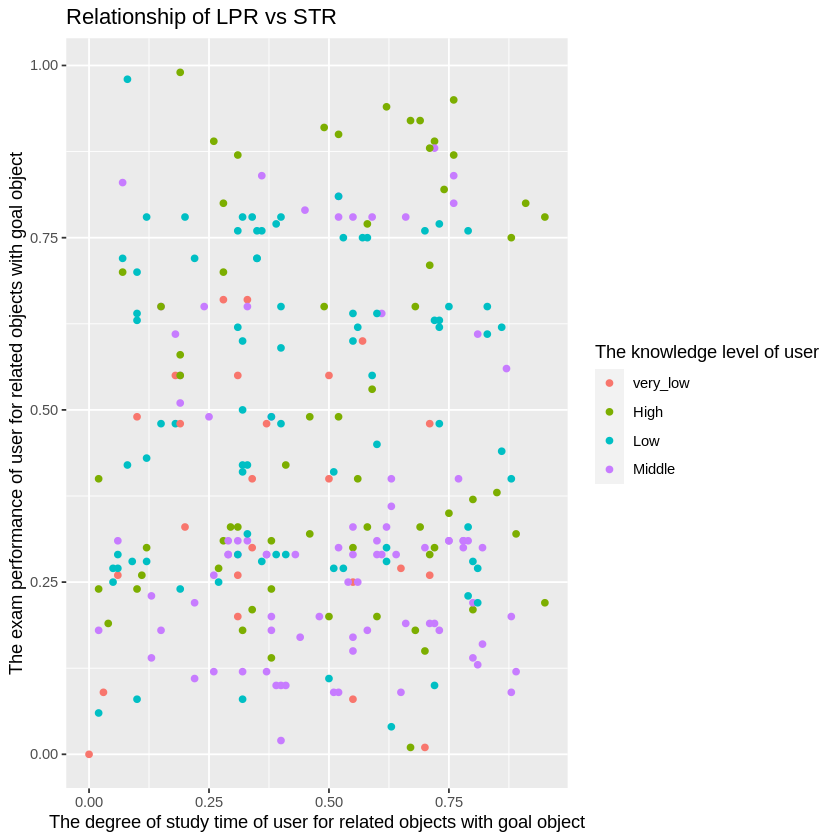

In [6]:
lpr_vs_str <- training_data %>%
            ggplot(aes(x = STR, y = LPR , color = UNS)) +
            geom_point() +
            labs(x = "The degree of study time of user for related objects with goal object", y = "The exam performance of user for related objects with goal object", color = "The knowledge level of user", title = "Relationship of LPR vs STR")
lpr_vs_str

## Method we use

## Expected outcomes and expectations